In [1]:
import qp_tls_losses.qp_tls_functions as qpf
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, k
from scipy.special import k0
import math

In [39]:
n = 1
temps = np.linspace(0.01,0.3,30)
Q0 = 1e6
b1 = 0.5
D = 1
b2 = 0.5
f = 4.5e9
Q_TLS = []
Q_QP = []
Q_tot = []
y1_val = []
y2_val = []
y3_val = []
T_QP = []
A0 = 100
Tc = 1.12
tr_temp = 0.2
sat_temp = 0.2
s = 0.02
for T in temps:
    Q_TLS.append(1/qpf.tls_loss(n, T, Q0, b1, b2, D, f))
    y1_val.append(1/A0/np.exp(1.764*Tc/T))
    y2_val.append(math.sinh(hbar*2*np.pi*f/2/k/T))
    y3_val.append(k0(hbar*2*np.pi*f/2/k/T)*math.sinh(hbar*2*np.pi*f/2/k/T))
    T_QP.append(qpf.T_QP_approx(T, tr_temp, sat_temp, s))
    Q_QP.append(1/qpf.qp_loss(T_QP[-1],A0,Tc,f))
    Q_tot.append(1/(qpf.tls_loss(n, T, Q0, b1, b2, D, f)+qpf.qp_loss(T_QP[-1],A0,Tc,f)))

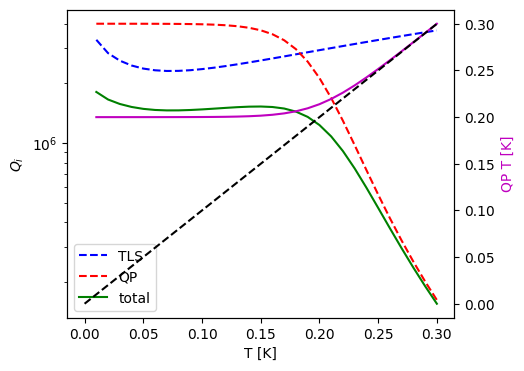

In [40]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(temps,Q_TLS,'--b',label='TLS')
ax.plot(temps,Q_QP,'--r',label='QP')
ax.plot(temps,Q_tot,'-g',label='total')
# ax.plot(temps,y1_val)
# ax.plot(temps,y3_val)
ax1 = ax.twinx()
ax1.plot(temps,T_QP,'-m')
ax1.plot([0,0.3],[0,0.3],'--k')
ax1.set_ylabel('QP T [K]',color='m')
ax.legend()
ax.set_ylabel(r'$Q_i$')
ax.set_xlabel(r'T [K]')
ax.set_yscale('log')

In [41]:
import os
import re
def natural_key(s):
    return [int(t) if t.isdigit() else t.lower()
            for t in re.split(r'(\d+)', s)]
data = {}
folder_path = r'G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data'
files = sorted(os.listdir(folder_path), key=natural_key)
for filename in files:
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as f:
            try:
                print(f'Processing: {file_path}')
                res_index, powers, fr, Qi, Qc, av_n, fr_err, Qi_err, Qc_err, R2, p_surf, p_MA, p_SA, p_MS = resa.read_data_from_hdf5_file(file_path)
                name_only = os.path.splitext(filename)[0]
                temperature = int(name_only.split("_")[-1].replace("mK", ""))
                data[filename] = {
                    'res_index': res_index,
                    'powers': powers,
                    'fr': fr,
                    'Qi' : Qi,
                    'Qc' : Qc,
                    'av_n' : av_n,
                    'fr_err' : fr_err,
                    'Qi_err' : Qi_err,
                    'Qc_err' : Qc_err,
                    'R2' : R2,
                    'temperature' : temperature,
                }
            except Exception as e:
                print(f' Error processing {file_path} : e')
data_for_Qi_graph = [data[fname]['Qi'] for fname in data]
data_for_fr = [np.mean(data[fname]['fr'],axis=1) for fname in data]
data_for_av_n = [data[fname]['av_n'] for fname in data]
#data_for_p_surf = [data[fname]['p_surf'] for fname in data]
data_for_qc_graph = [np.mean(data[fname]['Qc'],axis=1)  for fname in data]
labels = [key[:7] for key in data.keys()]
data_for_temperature= [data[fname]['temperature'] for fname in data]
data_for_powers = [data[fname]['powers'] for fname in data]

Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_30mK.hdf5
 Error processing G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_30mK.hdf5 : e
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_50mK.hdf5
 Error processing G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_50mK.hdf5 : e
Processing: G:\Shared drives\MSDE_Trade_Secrets\Projects\cryo_materials\cpw_resonators\2025\CD11_W137\temperature_measurements\processed_data\all_merged_data\W137D58_merged_processed_75mK.hdf5
 Error processi